# PCA 

![Alt text](pca.png)

PCA stands for Principal Component Analysis, which is a statistical technique used to reduce the dimensionality of large data sets. The goal of PCA is to identify patterns in the data and summarize them with a smaller number of variables, called principal components.

In PCA, the data is transformed into a new coordinate system, where the first principal component accounts for the largest possible variance in the data, and each subsequent component accounts for the next largest variance, subject to the constraint that it is uncorrelated with all the previous components. This allows us to capture the most important features of the data while discarding the noise and irrelevant information.

PCA can be used in various fields such as signal processing, image compression, and data visualization. It is also commonly used as a preprocessing step for machine learning algorithms, where it can help to improve the performance of the models by reducing the dimensionality of the data and removing the correlation among the input features.

We would use penguin dataset to illustrate. 

In [138]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [139]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/unsupervised-learning/PCA/penguins_size.csv')

penguin_new = penguin.loc[penguin["sex"] != "."]

penguins_df=penguin_new.dropna()

penguin_clean=penguin_new.dropna(how='any',axis=0)
penguin_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We select only numerical dataset in our dataframe. 

In [140]:

penguins_num=penguin_clean.select_dtypes(np.number)
penguins_num.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


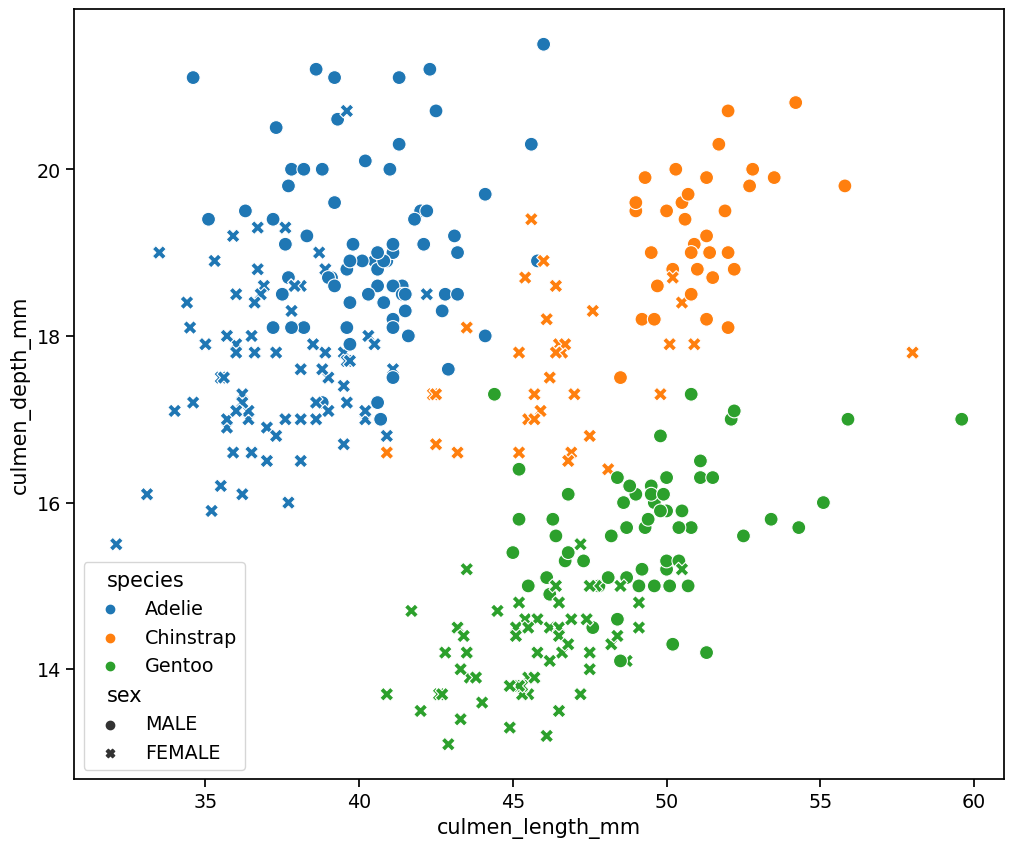

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm",
                    data=penguin_clean, 
                    hue="species",
                    style="sex",
                    s=100)


In [142]:
penguin_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We get the PCA and add sex and species for clear view in graph.

In [143]:

pca = PCA(n_components=4)
penguins_pca= pca.fit_transform(penguins_num)
pc_df = pd.DataFrame(data = penguins_pca , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])
sex = penguin_clean[["sex"]]
species = penguin_clean[["species"]]
pc_df['sex']=sex
pc_df['species']=species
pc_df.head()

,PC1,PC2,PC3,PC4,sex,species
0,-457.325073,13.351587,1.236560,-0.335803,MALE,Adelie
1,-407.252205,9.179113,-0.048921,-1.039967,FEMALE,Adelie
2,-957.044676,-8.160444,-2.525781,0.815745,FEMALE,Adelie
3,-757.115802,-1.867653,-4.908890,2.163656,NaN,NaN
4,-557.177302,3.389158,-1.150966,2.702623,FEMALE,Adelie


In [144]:
pca.explained_variance_ratio_*100

array([9.99893229e+01, 7.82232504e-03, 2.49073610e-03, 3.63992867e-04])

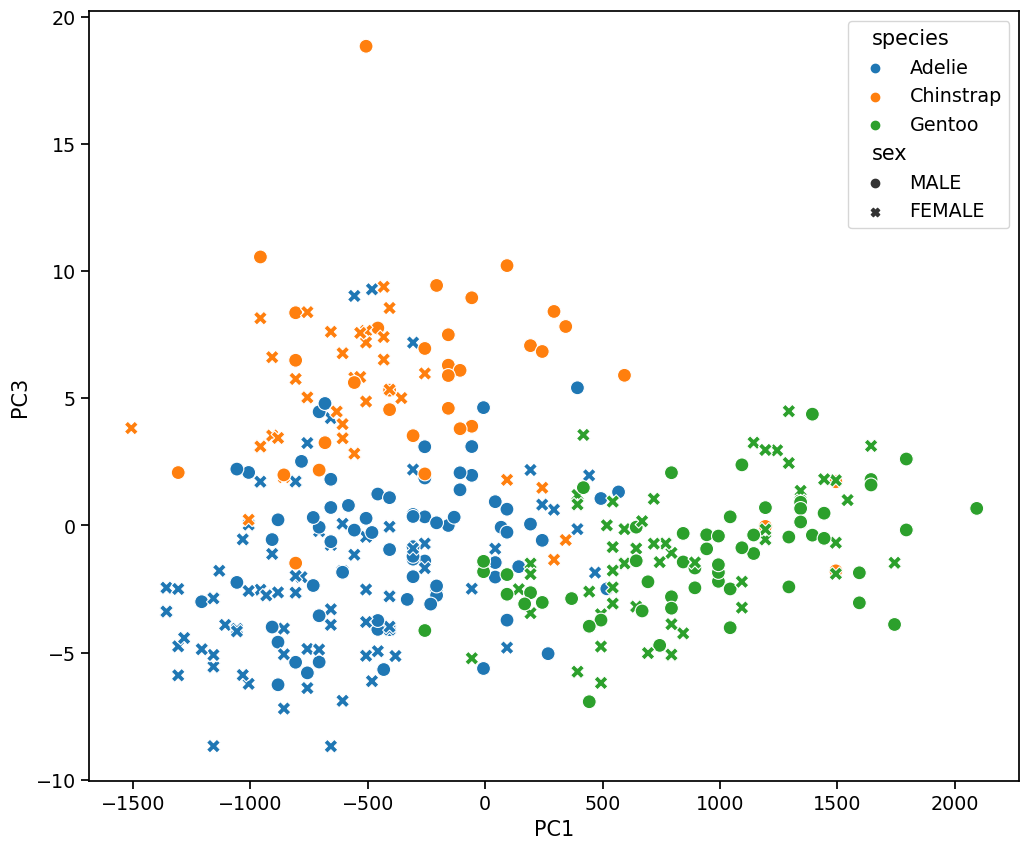

In [145]:
import seaborn as sns
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC3",
                    data=pc_df, 
                    hue="species",
                    style="sex",
                    s=100)

Both the graph and the ratio doesn't show a good result. Probably we need to scale the dataset. 

In [146]:
random_state = 0
pca_scaled = make_pipeline(StandardScaler(),
                    PCA(n_components=4, random_state=random_state))


In [147]:
penguins_pc_scaled=pca_scaled.fit_transform(penguins_num)


In [148]:
pca_scaled.named_steps['standardscaler'].fit_transform(penguins_num)

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [149]:
pca_scaled.named_steps['pca']
PCA(copy=True, iterated_power='auto', n_components=4, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=4, random_state=0)

In [150]:
pca_scaled.named_steps['pca'].explained_variance_ratio_*100

array([68.63389314, 19.45292928,  9.21606299,  2.69711459])

In [151]:
pc_scaled_df = pd.DataFrame(data = penguins_pc_scaled , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_scaled_df['Species'] = species
pc_scaled_df['Sex'] = sex
pc_scaled_df.head()
 

,PC1,PC2,PC3,PC4,Species,Sex
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,MALE
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,FEMALE
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,FEMALE
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,FEMALE


We plot to have a clear view

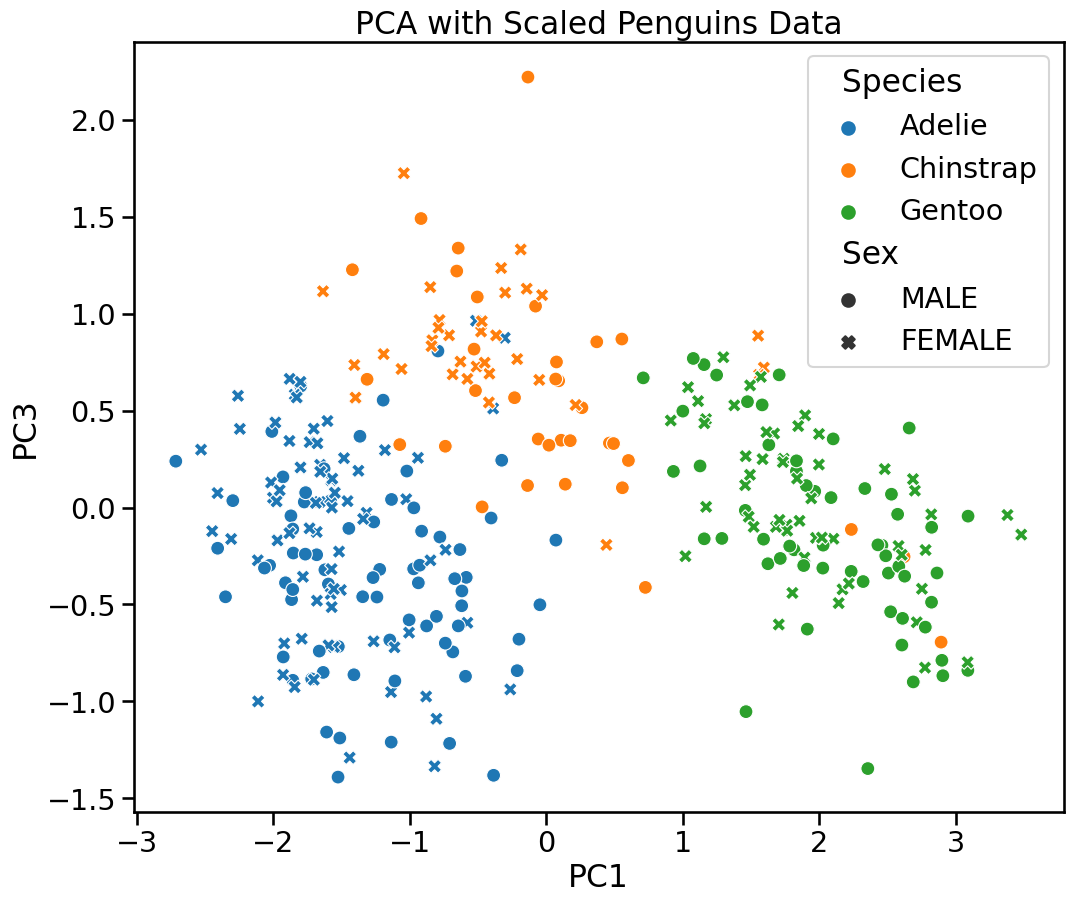

In [152]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC3",
                    data=pc_scaled_df, 
                    hue="Species",
                    style="Sex",
                    s=100)
    plt.title("PCA with Scaled Penguins Data")
plt.savefig("PCA_plot_PC1_vs_PC2_Penguins_scaled_data.png",
                    format='png',dpi=150)

The graph of PC1 and PC3 seems much better than before. 